![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 1-AMALIYOT. `matplotlib`


In [178]:
import pandas as pd
import numpy as np

Ushbu amaliyot uchun https://en.tutiempo.net/climate/ws-384570.html sahifasidagi Toshkent shahri o'rtacha havo harorati haqidagi ma'lumotlardan foydalanamiz.

![](https://i.imgur.com/lCIRIYm.png)

In [179]:
#@title QUYIDAGI KODGA TEGMANG!!! 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1-VAZIFA: Sahifadagi jadvalni pandas dataframega aylantiring va: 
### - Yil (`Year`) ustunini index sifatida o'qing.
### - 1990 yildan avvalgi ma'lumotlar tashlab yuboring.
### - natijani `df` degan o'zgaruvchiga saqlang

In [180]:
# JAVOBNI SHUYERGA YOZING
lists=pd.read_html('https://en.tutiempo.net/climate/ws-384570.html')
df=lists[3]
df=df[df.Year>1990].set_index('Year')

## 2-VAZIFA. Har bir ustun nimani anglatishi ham yuqoridagi sahifada joylashgan. Shu jadvalni ham chiqaring. Matnlarni [Google translate](https://translate.google.com) orqali tarjima qilib, uqib oling.

In [181]:
# JAVOBNI SHUYERGA YOZING
column_names=lists[4].set_index(0)
column_names.columns=['Full Name']
column_names.index.name='Acronym'
column_names.to_csv('weather-report-accronym.csv')

## 3-VAZIFA. `df`ni tahlil qilamiz

In [182]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1991 to 2023
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       33 non-null     object
 1   TM      33 non-null     object
 2   Tm      33 non-null     object
 3   PP      33 non-null     object
 4   V       33 non-null     object
 5   RA      33 non-null     object
 6   SN      33 non-null     object
 7   TS      33 non-null     object
 8   FG      33 non-null     object
 9   TN      33 non-null     object
 10  GR      33 non-null     object
dtypes: object(11)
memory usage: 3.1+ KB


,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8.0,595.38,5.1,66,28,4,9,0,0
1995,15.0,22.2,8.4,189.99,4.4,41,20,8,12,0,0


## 4-VAZIFA. `df`dagi barcha `-` belgilarni `NaN` qiymat bilan almashtiring. 

In [183]:
# JAVOBNI SHUYERGA YOZING
df.replace('-',np.nan, inplace=True)

## 5-VAZIFA. `df` ustunlari qiymatlarini matndan o'nlik songa (`float`) o'zgartiring.

In [184]:
# JAVOBNI SHUYERGA YOZING
df=df.astype(dtype='float')

## 6-VAZIFA. `NaN` qiymatlar bilan ishlaymiz
### 6.1. Har bir ustundagi `NaN` qiymatlar soni va ularning proprosiyasini toping.

In [185]:
# JAVOBNI SHUYERGA YOZING
df.isnull().sum()/len(df)*100

T     15.151515
TM    15.151515
Tm    15.151515
PP    72.727273
V     15.151515
RA    12.121212
SN    12.121212
TS    12.121212
FG    12.121212
TN    12.121212
GR    12.121212
dtype: float64

### 6.2. Eng ko'p `nan` qiymat mavjud ustunni tashlab yuboring va natijani saqlab qoling.

In [186]:
# JAVOBNI SHUYERGA YOZING
df.drop(df.isnull().sum().idxmax(),axis=1, inplace=True) # maximum nan valuelarni olish uchun birinchi osha nan qatnashgan columnlar uchun barcha qiymatlarni olamiz
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0


### 6.3. Qolgan `NaN` qiymatlarni o'zingiz to'g'ri deb bilgan usulda to'ldiring (tashlab yubormang) va natijani saqlab qoling.

In [187]:
# JAVOBNI SHUYERGA YOZING
df.fillna(method='ffill', inplace=True)

### 6.4. Yakuniy `df` ni csv faylga saqlab, kompyuterga (yoki githubga) yuklab oling (keyingi darsda ishlatamiz)

In [188]:
# JAVOBNI SHUYERGA YOZING
df.to_csv('weather-report.csv')

##7-VAZIFA. Chiziqli grafiklar

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

### 7.1. `df`dan yillik o'rtacha haroratni ko'rsatuvchi ustunni `x` o'zgaruvchiga saqlang va `plt.plot()` yordamida chiziqli grafik chizing.

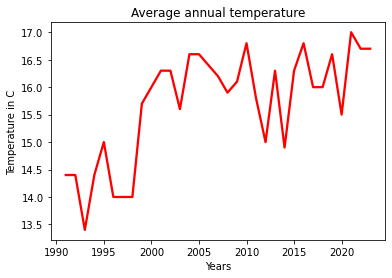

In [190]:
# JAVOBNI SHUYERGA YOZING
x=df['T']
plt.plot(x, color='r', linewidth=2.3,)
plt.title('Average annual temperature')
plt.xlabel('Years')
plt.ylabel('Temperature in C')
plt.show()

### 7.2. Yuqoridagi grafikni hajmini kattalashtiring, chiziq qalingligi, turi, rangi, markerlar turini istalgancha o'zgartiring

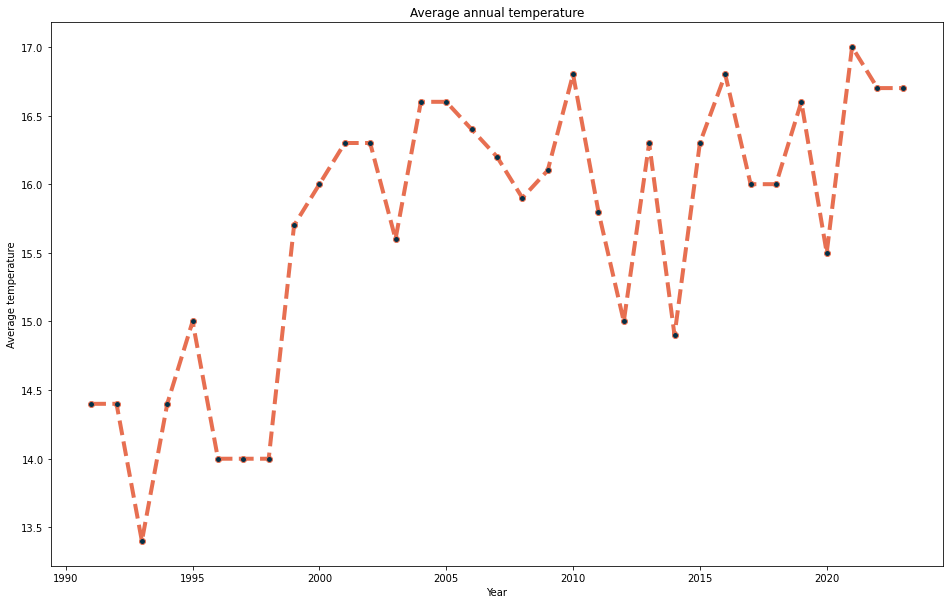

In [191]:
# JAVOBNI SHUYERGA YOZING
x=df['T']
plt.figure(figsize=(16,10))
plt.plot(x, color='#e76f51',linestyle='--',linewidth=4,marker='o',markerfacecolor='#023047')
plt.title('Average annual temperature')
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.show()

### 7.3. Yuqoridagi grafikda x va y o'qlarini nomlang, grafikka ham umumiy nom bering

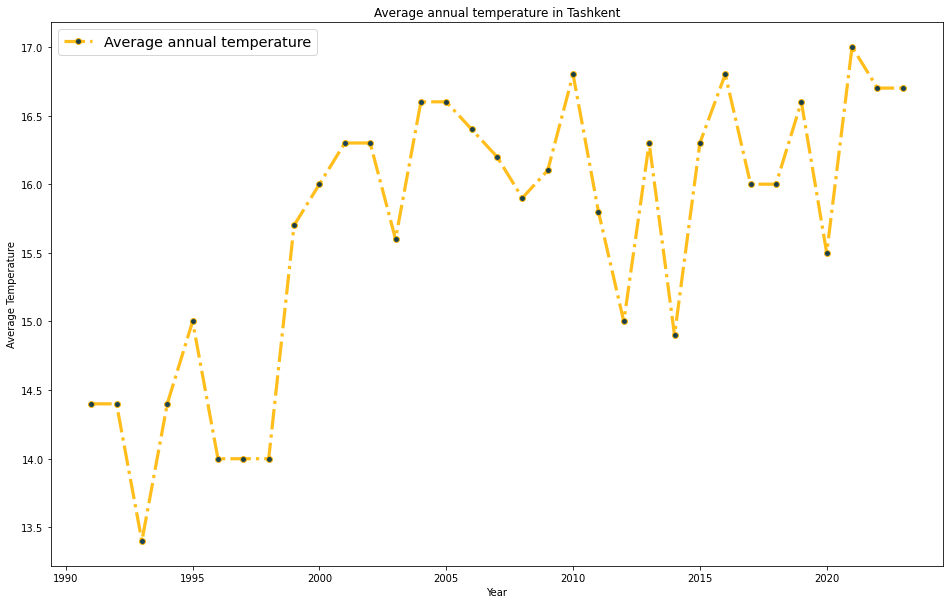

In [192]:
# JAVOBNI SHUYERGA YOZING
x=df['T']
plt.figure(figsize=(16,10))

plt.plot(x, color='#ffb703', marker='o', markerfacecolor='#023047', alpha=0.9, linewidth=3.2, linestyle='-.' )
plt.title('Average annual temperature in Tashkent')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(['Average annual temperature'], loc='best', fontsize='x-large')
plt.show()

## 8-VAZIFA. Toshkent shahri uchun, har bir yilda o'rtacha min va max haroratlarni ko'rsatuvchi grafik chizing. **Grafikni faylga saqlab oling**

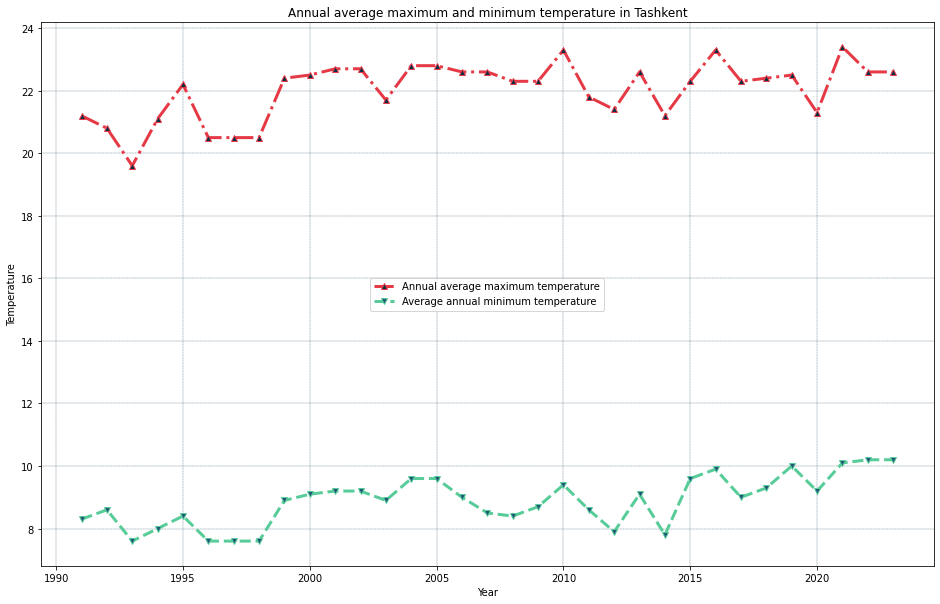

In [193]:
# JAVOBNI SHUYERGA YOZING
# TM	Annual average maximum temperature
# Tm	Average annual minimum temperature

x,y=df['TM'], df['Tm']
plt.figure(figsize=(16,10))
plt.plot(x, color='#e63946', marker='^', markerfacecolor='#023047', linewidth=3, linestyle='-.')
plt.plot(y,color='#57cc99', marker='v', markerfacecolor='#22577a', linewidth=3, linestyle='--')
plt.title('Annual average maximum and minimum temperature in Tashkent')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(['Annual average maximum temperature','Average annual minimum temperature'], loc='center')
plt.grid(color='#003049',linestyle='--',linewidth=.3)
plt.savefig('temperature min-max.png')
plt.show()

## 9-VAZIFA. Faylga saqlangan grafikni ochib ko'ring.

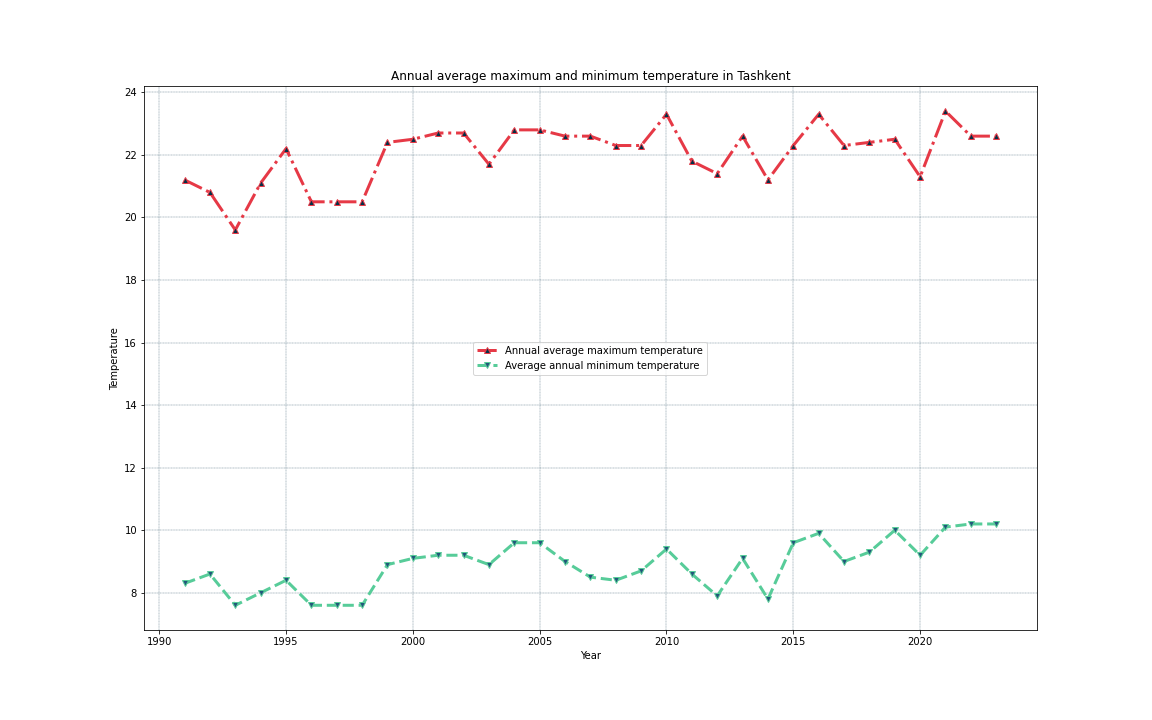

In [194]:
# JAVOBNI SHUYERGA YOZING
from IPython.display import Image
Image('temperature min-max.png')